In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
def load_house_data():
    data = {
        'size(sqft)': [1000, 1500, 800, 1200, 2000, 1700, 1300, 950, 1600, 1800],
        'bedrooms':   [2, 3, 2, 3, 4, 3, 3, 2, 4, 4],
        'floors':     [1, 2, 1, 1, 2, 2, 1, 1, 2, 2],
        'age':        [10, 5, 20, 15, 3, 7, 12, 18, 6, 4],
        'price':      [200000, 300000, 180000, 250000, 400000, 350000, 270000, 190000, 330000, 370000]
    }

    df = pd.DataFrame(data)
    X = df[['size(sqft)', 'bedrooms', 'floors', 'age']]
    y = df['price']
    return X, y

In [5]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

In [28]:
print(X_train.shape)
print(y_train.shape)

(10, 4)
(10,)


In [10]:
scaler = StandardScaler() # srandardize for data mean=0 and standard =1
X_norm = scaler.fit_transform(X_train) # x-mean//standard
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:size(sqft)    1200
bedrooms         2
floors           1
age             17
dtype: int64
Peak to Peak range by column in Normalized X:[3.17303796 2.5819889  2.         2.96832876]


In [ ]:
#stochastic gradient descent
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 1000, number of weight updates: 10001.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [14]:
sgdr.intercept_

array([283997.40317282])

In [15]:
sgdr.coef_

array([47179.9497219 , 17644.25884771,  8880.30576338, -2213.19075724])

In [25]:
y_pred = sgdr.predict(X_norm)

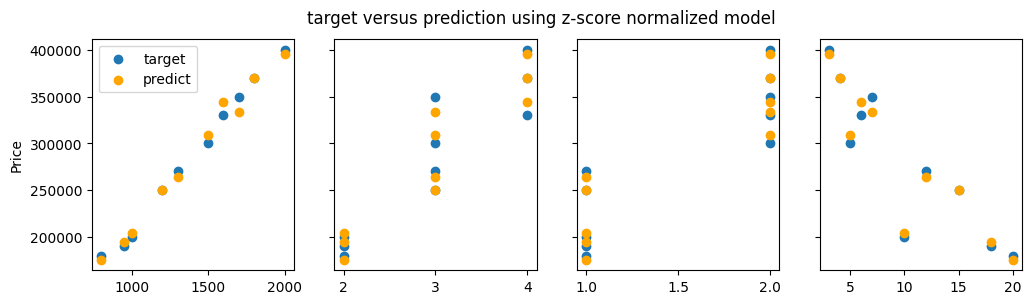

In [31]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[X_features[i]],y_train, label = 'target')
    ax[i].scatter(X_train[X_features[i]],y_pred,color='orange', label = 'predict')
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()